In [212]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
# from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import hvplot.pandas

In [213]:
df = pd.read_csv('Resources/crypto_data.csv')
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [215]:
#filter for currencies that are currently being traded
df_filter = df[df['IsTrading']==True]
df_filter

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [216]:
# # #saving the column for later use
# coin_name=df_filter[['CoinName']]
# coin_name

In [217]:
#Drop IsTrading and CoinName from dataframe
drop_df=df_filter.drop(['Unnamed: 0','IsTrading', 'CoinName'], axis=1)
drop_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,X11,PoW/PoS,NaN,2300000000
2,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SHA-256,PoW,NaN,611000
4,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...
1243,Ethash,PoW,NaN,1000000000
1244,SHA-256,DPoI,NaN,1000000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [218]:
# Find null values
for column in drop_df.columns:
    print(f"Column {column} has {drop_df[column].isnull().sum()} null values")

Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [221]:
# Remove all rows that have null values.
nAn_df = drop_df.dropna()
nAn_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [222]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
clean_df=nAn_df[nAn_df['TotalCoinsMined']>0]
clean_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [223]:
# Identify all the possible values in the class column
clean_df['Algorithm'].unique()
print(clean_df['Algorithm'].nunique())

71


In [224]:
# Identify all the possible values in the class column
clean_df['ProofType'].unique()
print(clean_df['ProofType'].nunique())

25


In [227]:
# #Convert the remaining features with text values, Algorithm and ProofType, into numerical data. 
final_crypto=pd.get_dummies(clean_df['ProofType'],['Algorithm'])
print(final_crypto.columns)
final_crypto

Index(['['Algorithm']_DPOS', '['Algorithm']_DPoS', '['Algorithm']_HPoW',
       '['Algorithm']_LPoS', '['Algorithm']_POBh', '['Algorithm']_PoA',
       '['Algorithm']_PoC', '['Algorithm']_PoS', '['Algorithm']_PoS/LPoS',
       '['Algorithm']_PoS/PoW', '['Algorithm']_PoS/PoW/PoT',
       '['Algorithm']_PoST', '['Algorithm']_PoW', '['Algorithm']_PoW + Hive',
       '['Algorithm']_PoW and PoS', '['Algorithm']_PoW/PoS',
       '['Algorithm']_PoW/PoS ', '['Algorithm']_PoW/PoW',
       '['Algorithm']_PoW/nPoS', '['Algorithm']_Pos',
       '['Algorithm']_Proof of Authority', '['Algorithm']_Proof of Trust',
       '['Algorithm']_TPoS', '['Algorithm']_Zero-Knowledge Proof',
       '['Algorithm']_dPoW/PoW'],
      dtype='object')


,['Algorithm']_DPOS,['Algorithm']_DPoS,['Algorithm']_HPoW,['Algorithm']_LPoS,['Algorithm']_POBh,['Algorithm']_PoA,['Algorithm']_PoC,['Algorithm']_PoS,['Algorithm']_PoS/LPoS,['Algorithm']_PoS/PoW,...,['Algorithm']_PoW/PoS,['Algorithm']_PoW/PoS,['Algorithm']_PoW/PoW,['Algorithm']_PoW/nPoS,['Algorithm']_Pos,['Algorithm']_Proof of Authority,['Algorithm']_Proof of Trust,['Algorithm']_TPoS,['Algorithm']_Zero-Knowledge Proof,['Algorithm']_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Dimensionality Reduction

In [228]:
# Scale the data
scaler = StandardScaler()
scaled_data= scaler.fit_transform(final_crypto)

In [229]:
# Create a new dataframe with the transormed data
scaled_crypto=pd.DataFrame(scaled_data, columns=final_crypto.columns[0:])
scaled_crypto

,['Algorithm']_DPOS,['Algorithm']_DPoS,['Algorithm']_HPoW,['Algorithm']_LPoS,['Algorithm']_POBh,['Algorithm']_PoA,['Algorithm']_PoC,['Algorithm']_PoS,['Algorithm']_PoS/LPoS,['Algorithm']_PoS/PoW,...,['Algorithm']_PoW/PoS,['Algorithm']_PoW/PoS,['Algorithm']_PoW/PoW,['Algorithm']_PoW/nPoS,['Algorithm']_Pos,['Algorithm']_Proof of Authority,['Algorithm']_Proof of Trust,['Algorithm']_TPoS,['Algorithm']_Zero-Knowledge Proof,['Algorithm']_dPoW/PoW
0,-0.043396,-0.131181,-0.043396,-0.043396,-0.043396,-0.043396,-0.075307,-0.439119,-0.043396,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.043396,-0.131181,-0.043396,-0.043396,-0.043396,-0.043396,-0.075307,-0.439119,-0.043396,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,-0.043396,-0.131181,-0.043396,-0.043396,-0.043396,-0.043396,-0.075307,-0.439119,-0.043396,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.043396,-0.131181,-0.043396,-0.043396,-0.043396,-0.043396,-0.075307,-0.439119,-0.043396,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.043396,-0.131181,-0.043396,-0.043396,-0.043396,-0.043396,-0.075307,-0.439119,-0.043396,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.043396,7.623064,-0.043396,-0.043396,-0.043396,-0.043396,-0.075307,-0.439119,-0.043396,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
528,-0.043396,-0.131181,-0.043396,-0.043396,-0.043396,-0.043396,-0.075307,-0.439119,-0.043396,-0.06143,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
529,-0.043396,-0.131181,-0.043396,-0.043396,-0.043396,-0.043396,-0.075307,-0.439119,-0.043396,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
530,-0.043396,-0.131181,-0.043396,-0.043396,-0.043396,-0.043396,-0.075307,-0.439119,-0.043396,-0.06143,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


In [230]:
# Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA
# model, it is possible to state the desired explained variance.
pca = PCA(n_components=0.90)
# get principal components for the data
pca_crypto_data = pca.fit_transform(scaled_crypto)

In [231]:
#Create a dataframe with the transformed data
pca_crypto_data = pd.DataFrame(data=pca_crypto_data)
pca_crypto_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.523707,-0.841653,-0.217476,0.061609,0.013111,0.007224,2.400702e-16,5.579971e-16,6.900712e-16,-6.004637e-16,...,5.839048e-16,-1.836514e-15,-8.303462e-16,7.221109e-16,-1.424295e-15,-5.710567e-16,-1.328759e-16,-1.116658e-15,1.257849e-14,7.933680e-16
1,1.523707,-0.841653,-0.217476,0.061609,0.013111,0.007224,4.531350e-16,5.630059e-16,7.178154e-16,-4.616623e-16,...,6.757924e-16,-1.080879e-15,-5.568976e-16,7.614354e-16,-1.567795e-15,-5.097453e-16,-5.086195e-16,-1.198413e-15,1.040217e-14,1.737604e-15
2,1.523707,-0.841653,-0.217476,0.061609,0.013111,0.007224,4.302865e-16,1.423626e-16,8.477046e-16,-8.189977e-16,...,9.919689e-16,-2.424880e-15,-1.332726e-15,1.446491e-15,-1.865970e-15,-6.268458e-16,-2.407625e-16,-1.273180e-15,1.069951e-14,1.181074e-15
3,-1.360509,-0.353535,-0.129999,0.037567,0.008035,0.004433,1.218606e-16,-5.754300e-16,-7.387586e-16,-6.270044e-16,...,-3.189764e-16,-4.907163e-17,6.688884e-17,1.106023e-15,-1.117375e-15,1.020923e-16,-8.845769e-16,-5.873986e-16,5.845456e-15,-3.914548e-16
4,-1.360509,-0.353535,-0.129999,0.037567,0.008035,0.004433,4.092062e-16,2.781328e-16,-8.342314e-16,-2.770077e-16,...,-5.355253e-16,2.581517e-15,3.397001e-16,2.284874e-16,-2.148989e-16,3.337471e-16,1.384220e-16,-7.366856e-17,5.029558e-15,-2.197192e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0.356535,0.743470,5.560054,5.263447,0.530804,0.259298,2.176128e-14,-5.937388e-14,5.464131e-14,1.884744e-14,...,-4.266014e-15,-3.409495e-14,1.792038e-14,3.647186e-15,3.861352e-15,-7.664931e-15,-3.170601e-14,-2.207392e-15,3.499319e-13,5.993842e-14
528,1.523707,-0.841653,-0.217476,0.061609,0.013111,0.007224,1.639412e-16,5.134556e-16,6.598409e-16,-5.871187e-16,...,5.574615e-16,-1.607270e-15,-7.821636e-16,8.118237e-16,-1.331566e-15,-5.145240e-16,-2.593595e-16,-1.032290e-15,1.061188e-14,5.650172e-16
529,-1.360509,-0.353535,-0.129999,0.037567,0.008035,0.004433,2.965087e-16,-1.622619e-16,-3.933519e-17,-4.184220e-16,...,-4.778204e-16,4.769904e-16,-5.789319e-17,3.585501e-16,-3.382820e-16,4.747107e-17,-3.274869e-16,-2.602236e-16,5.607162e-15,-1.185863e-15
530,-1.360509,-0.353535,-0.129999,0.037567,0.008035,0.004433,2.965087e-16,-1.622619e-16,-3.933519e-17,-4.184220e-16,...,-4.778204e-16,4.769904e-16,-5.789319e-17,3.585501e-16,-3.382820e-16,4.747107e-17,-3.274869e-16,-2.602236e-16,5.607162e-15,-1.185863e-15


In [233]:
#  run t-SNE on the principal components: the output of the PCA transformation
tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(pca_crypto_data)

In [234]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

In [235]:
# Prepare to plot the dataset
# The first column of transformed features
pca_crypto_data['x'] = tsne_features[:,0]

# The second column of transformed features
pca_crypto_data['y'] = tsne_features[:,1]

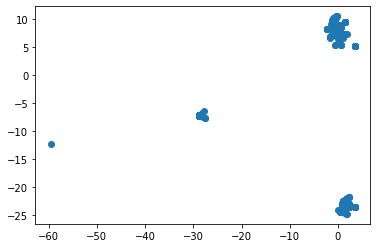

In [236]:
# Visualize the clusters
plt.scatter(pca_crypto_data['x'], pca_crypto_data['y'])
plt.show()

In [237]:
# Initializing model with K=2
model = KMeans(n_clusters=2, random_state=12)

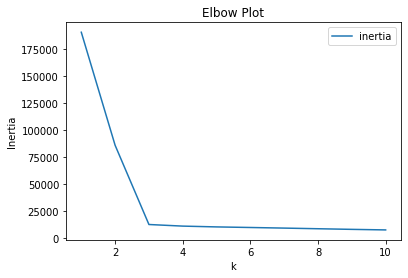

In [239]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_crypto_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
# df_elbow.hvplot.line(x = 'k', y = 'inertia', titles = 'clusters')


elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot.line(x='k', y='inertia')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()



# Recommendation

Based on my findings, the cryptocurrencies could be clustered together into 3 clusters to create a classification system for this new investment. My conclusion is based on the k-means algorithm which is an unsupervised clustering algorithm. The data is grouped into 3 distinct groups which provides greater clarity and clean lines of delineation between all of our crypto base. We don’t know whats in these 3 groups but we will be able to use this info to conduct further research on cryptocurrencies.